Using device: cuda


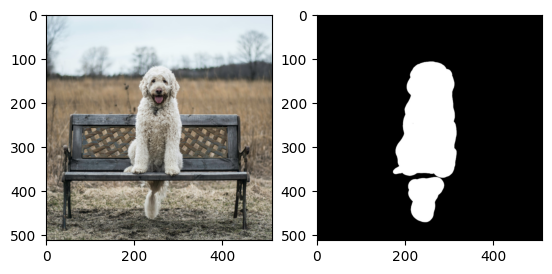

In [21]:
import torch
import requests
from io import BytesIO
from matplotlib import pyplot as plt
import cv2
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from transformers import CLIPTokenizer
from PIL import Image
import glob

# We'll be exploring a number of pipelines today!
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusion3Pipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline,
)


device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"Using device: {device}")


# We'll use a couple of demo images later in the notebook
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")


# Download images for inpainting example
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
plt.subplot(1,2,1)
plt.imshow(init_image)
plt.subplot(1,2,2)
plt.imshow(mask_image)

In [22]:
# Load the pipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

# model_id = "stabilityai/stable-diffusion-3.5-large"
# pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large", torch_dtype=torch.bfloat16).to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 13.30it/s]


100%|██████████| 400/400 [01:36<00:00,  4.16it/s]


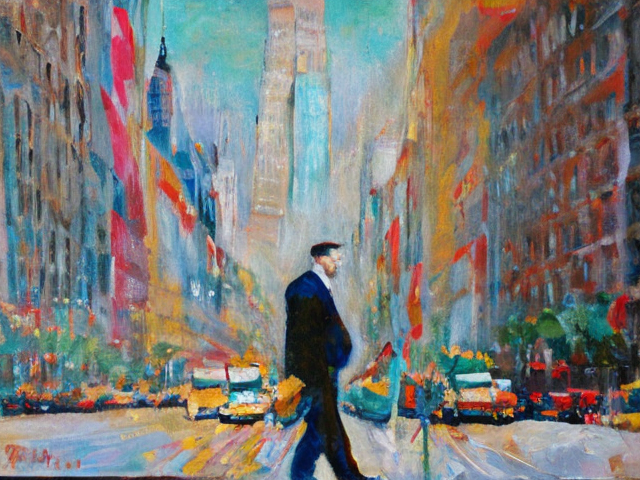

In [ ]:
# Set up a generator for reproducibility
# generator = torch.Generator(device=device).manual_seed(42)

# Run the pipeline, showing some of the available arguments
pipe_output = pipe(
    # prompt="Palette knife painting of an autumn cityscape",  # What to generate
    prompt= "A colorful oil print image of A man walking in New York city",
    negative_prompt="Undersaturated, low quality",  # What NOT to generate
    height=480,
    width=640,  # Specify the image size
    guidance_scale=8,  # How strongly to follow the prompt
    num_inference_steps=400,  # How many steps to take
    # generator=generator,  # Fixed random seed
)

# View the resulting image
pipe_output.images[0]